In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from persim import plot_diagrams

In [2]:
from astropology.constants import PASSBANDS, CLASSES
from astropology.distance import bottleneck_distance
from astropology.distance import wasserstein_distance
from astropology.simulate import random_remove_points
from astropology.series import pd_time_series

In [3]:
data_directory = "/home/edgar/astropology/data/"

lcs = pd.read_csv(
    f"{data_directory}/plasticc_train_lightcurves.csv.gz",
)
meta_data = pd.read_csv(
    f"{data_directory}/plasticc_train_metadata.csv.gz",
    index_col="object_id"
)

In [4]:
g_mask = lcs["passband"] == PASSBANDS["g"]
g_df = lcs.loc[g_mask].copy()
g_df.head()
object_ids = g_df["object_id"].unique()

## Distance Vs Cadence

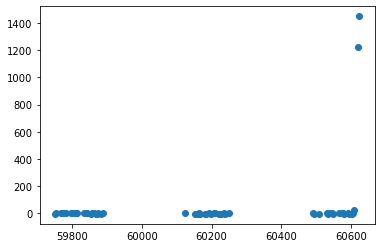

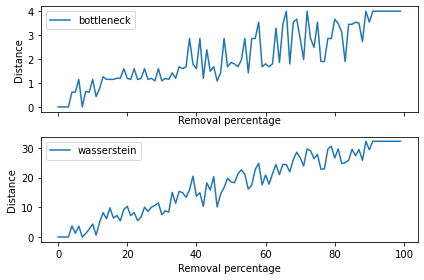

In [30]:
idx_lc = 6
flux = g_df.loc[g_df["object_id"]==object_ids[idx_lc], "flux"].to_numpy()
mjd = g_df.loc[g_df["object_id"]==object_ids[idx_lc], "mjd"].to_numpy()

fig_signal, ax_signal = plt.subplots()
ax_signal.scatter(mjd, flux)

pdgm_control = pd_time_series(signal=flux)

removal_percentages = np.arange(0, 100, 1)
# remove point at infinity before computing distances
pdgm_i = pdgm_control[np.isfinite(pdgm_control[:, 1]), :]

wds = np.empty(removal_percentages.size)
bds = np.empty(removal_percentages.size)

mjds_mask_removal = np.empty((removal_percentages.size, flux.size))

for idx, percentage in enumerate(removal_percentages):

    remove_mask = random_remove_points(flux.size, percentage)
    mjds_mask_removal[idx, :] = remove_mask
    
    pdgm_j = pd_time_series(flux[remove_mask])
    pdgm_j = pdgm_j[np.isfinite(pdgm_j[:, 1]), :]

    wds[idx] = wasserstein_distance(pdgm_i, pdgm_j)
    bds[idx] = bottleneck_distance(pdgm_i, pdgm_j)

fig, axs = plt.subplots(
    nrows=2, ncols=1, tight_layout=True,# figsize=(6, 3),
    sharex=True, #sharey=True
)
# plt.plot(amplitudes, wds)
axs[0].plot(removal_percentages, bds, label="bottleneck")
axs[1].plot(removal_percentages, wds, label="wasserstein")

for ax in axs: ax.set_xlabel("Removal percentage")
for ax in axs: ax.set_ylabel("Distance")
for ax in axs: ax.legend()
# for ax in axs: ax.set_yscale("log") #, ax.set_yscale("log")